# MAC 5768 - Projeto EP2 - Parte 2 - Normalização e Análise da variação das classes 




#### Integrantes do grupo:
- Ysabelle Pinheiro de Sousa - ysabellesousa@gmail.com - 11341314
- Roberto Gaui - rgaui@yahoo.com.br - 1851224
- Joaquin Lorenzo Pereira Condori - joaquin.condori@usp.br - 11857963


####  Link para repositório projeto: 

https://github.com/YsabelleSousa/mac_5768_ep_visao_proc_imagens

#### Instrução para download dos dados:

- Original Dataset: https://drive.google.com/file/d/10zncW_BxhBd2x0CpuddXFffeBKK05HAI/view?usp=sharing

- Original Gray Dataset: https://drive.google.com/file/d/1ysWqNRKmY70uAZvxbM-izmTcmjTsKfv1/view?usp=sharing

- Augmented Dataset: 

- Normalized Dataset:


**1)** Gerar o link compartilhável da pasta zipada no google drive e atribuir a permissão de leitura para **"Qualquer pessoa com o link"**

**2)** Baixar os dados do link compartilhável e colocar na pasta **"data"** do repositório.

**3)** Escolher o path de destino e atribuir à variável **"data_path"** na seção **"Extraindo informações dos dados para DF"**

## Importando bibliotecas

In [11]:
import pandas as pd
import os
from skimage import data, exposure, img_as_float
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pylab import *

In [6]:
data_path = 'data/augmentedDataset'
normalized_data_path = 'data/normalizedDataset'

## Criando Subdiretórios para armazenamento das imagens normalizadas

In [9]:
%%time
for root, subdirs, files in os.walk(os.path.abspath(data_path)):
    for subdir in subdirs: 
        if os.path.exists(os.path.abspath('data/originalGrayDataset/PB/')):
            if subdir not in ['AVG','GRD','LOG','EXP']:
                os.makedirs(os.path.abspath('data/normalizedDataset/'+subdir),exist_ok=True)

CPU times: user 13.6 ms, sys: 20.7 ms, total: 34.3 ms
Wall time: 36.6 ms


## Normalizando Imagens e atribuindo ao 'normalizedDataset'

In [12]:
def histeq(im,nbr_bins=128):
    """  Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(),bins[:-1],cdf)

    return im2.reshape(im.shape).astype('uint8'), cdf

<ipython-input-37-1aebd78ea5d7>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)


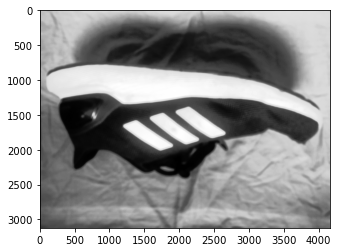

In [40]:
img = array(Image.open('C:/Users/sousay/Desktop/EP2 - USP/data/augmentedDataset/AVG/tenis/tenis_1_azul_dia_dentro_2.jpg'))
img_norm,cdf = histeq(img)
plt.imshow(img_norm,cmap='gray', vmin=0, vmax=255)
#img_norm.astype(np.uint8)
#Image.fromarray(img_norm)

In [13]:
%%time
for root, subdirs, files in os.walk(os.path.abspath(data_path)):
    for file in files:
        if file.count('_') == 5:
            file_path = root+'/'+file
            file_class = root.split('/')[-1]
                        
            img = array(Image.open(file_path))
            img_norm, cdf = histeq(img)           
            Image.fromarray(img_norm).save(os.path.abspath('data/normalizedDataset/')+'/'+file_class+'/'+file)
            #plt.imshow(img_norm,cmap='gray', vmin=0, vmax=255)
            

/Users/ysabellesousa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


OSError: [Errno 28] No space left on device

## Protótipo Médio de cada classe
Soma todos os histogramas de todas as imagens de determinada classe, e divide pela quantidade de imagens

In [19]:
def sum_array(arr):
    y = 0
    for x in arr:
        y += x
    return y

In [20]:
teste_path = 'data/teste/'

CLASSE: teste


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Wall time: 4.29 s


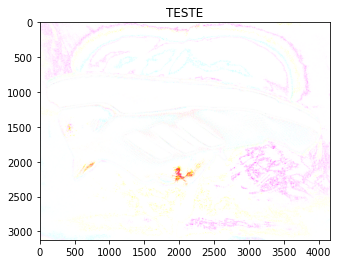

In [203]:
%%time
cont=0
arr = list()
for root, subdirs, files in os.walk(os.path.abspath(teste_path)):
    for file in files:        
        if file.count('_') == 5:
            file_class = root.split('\\')[-1]           
            file_path = root+'\\'+file
            shape_default = np.array(Image.open(root+'\\'+files[0])).astype('uint8').shape            
            img = np.array(Image.open(file_path)).astype('uint8')
    
            if img.shape != shape_default:
                img = img.reshape(shape_default)
            
            arr.append(img)
            cont = cont + 1
                
    result = sum_array(arr)/cont if cont != 0 else 0
    cont= 0

print("CLASSE:", file_class)
plt.title(file_class.upper());
plt.imshow(result,cmap='gray', vmin=0, vmax=255);

## Histograma Médio de cada classe

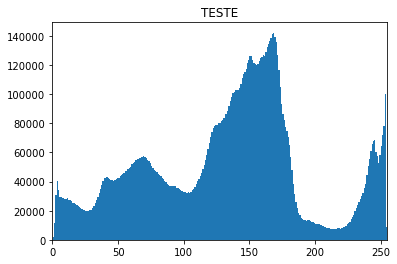

Wall time: 1.77 s


In [239]:
%%time
cont=0
arr_hist = list()
for root, subdirs, files in os.walk(os.path.abspath(teste_path)):
    for file in files:        
        if file.count('_') == 5:
            file_class = root.split('\\')[-1]           
            file_path = root+'\\'+file           
            img = Image.open(file_path)                   
            
            vals = array(img).mean(axis=2).flatten()
            arr_hist.append(vals)
            
            cont = cont + 1
                
    result = sum_array(arr_hist)/cont if cont != 0 else 0
    cont= 0

plt.title(file_class.upper());
b, bins, patches = plt.hist(result, 255)
plt.xlim([0,255])
plt.show()

## Variância do Histograma de cada classe

[ 12.85555556  38.34444444  63.83333333  89.32222222 114.81111111
 140.3        165.78888889 191.27777778 216.76666667 242.25555556]


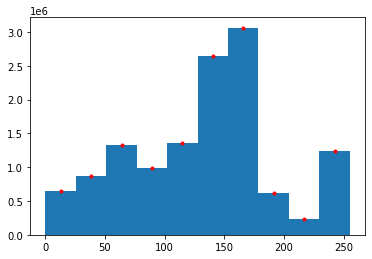

CPU times: user 2.44 s, sys: 489 ms, total: 2.93 s
Wall time: 2.99 s


In [24]:
%%time
cont=0
arr_hist = list()
for root, subdirs, files in os.walk(os.path.abspath(teste_path)):
    for file in files:        
        if file.count('_') == 5:
            
            file_class = root.split('/')[-1]           
            file_path = root+'/'+file  
            
            img = Image.open(file_path)                   
                        
            vals = array(img).mean(axis=2).flatten()
            
            #Cria array das imagens
            arr_hist.append(vals)
            
            
            cont = cont + 1
                
    result = sum_array(arr_hist)/cont if cont != 0 else 0
    #n, bins = np.histogram(result)
    
    entries, edges, _ = plt.hist(result)

    # calculate bin centers
    bin_centers = 0.5 * (edges[:-1] + edges[1:])
    print(bin_centers)
    #cont= 0

#plt.title(file_class.upper());
#b, bins, patches = plt.hist(result, 255)
#plt.xlim([0,255])
plt.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='r.')
plt.show()